

## Business Objective:  To detect fraudulent transaction in credit card transactions.

#### Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Import Data sets (Dataset is donloaded from Kaggle)

In [4]:
fraud_df = pd.read_csv("D:\\Project\\FraudDetection\\creditcard.csv")

In [5]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
fraud_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
fraud_df.shape

(284807, 31)

In [13]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
fraud_df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

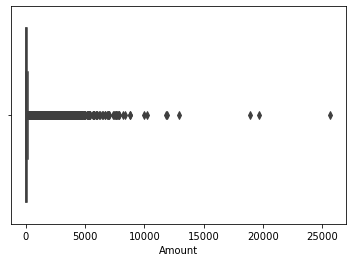

In [17]:
sns.boxplot(fraud_df.Amount)


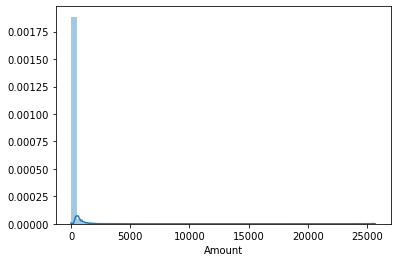

In [27]:
sns.distplot(fraud_df.Amount )

0    99.827251
1     0.172749
Name: Class, dtype: float64


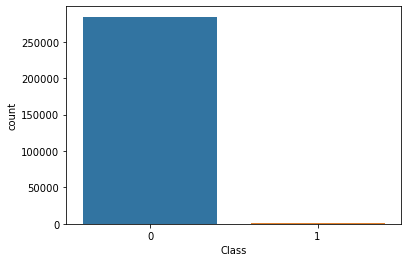

In [31]:
print((fraud_df["Class"].value_counts()/fraud_df["Class"].count())*100)


sns.countplot(fraud_df["Class"])

0 -----   284315 Genuine Transactions
1 -----    492   Fraudelnt  Transactions

In [ ]:
# This is cleraly a case of imbalanced datasets

In [34]:
# Determine number of fraud cases in dataset 
fraud_transactions = fraud_df[fraud_df['Class'] == 1] 
genuine_transactions = fraud_df[fraud_df['Class'] == 0] 

print('Fraud Cases: {}'.format(len(fraud_transactions))) 
print('Genuine Transactions: {}'.format(len(genuine_transactions)))

Fraud Cases: 492
Genuine Transactions: 284315


In [35]:
outlierFraction = len(fraud_transactions)/float(len(genuine_transactions)) 
print(outlierFraction) 

0.0017304750013189597


#### Summary of Genine Transactions

In [36]:
genuine_transactions[["Amount","Class"]].describe()

,Amount,Class
count,284315.000000,284315.0
mean,88.291022,0.0
std,250.105092,0.0
min,0.000000,0.0
25%,5.650000,0.0
50%,22.000000,0.0
75%,77.050000,0.0
max,25691.160000,0.0


#### Summary of Fraudalent Transactions

In [37]:
fraud_transactions[["Amount","Class"]].describe()

,Amount,Class
count,492.000000,492.0
mean,122.211321,1.0
std,256.683288,0.0
min,0.000000,1.0
25%,1.000000,1.0
50%,9.250000,1.0
75%,105.890000,1.0
max,2125.870000,1.0


#### Corelation Analysis

In [40]:
corr_mat = fraud_df.corr()


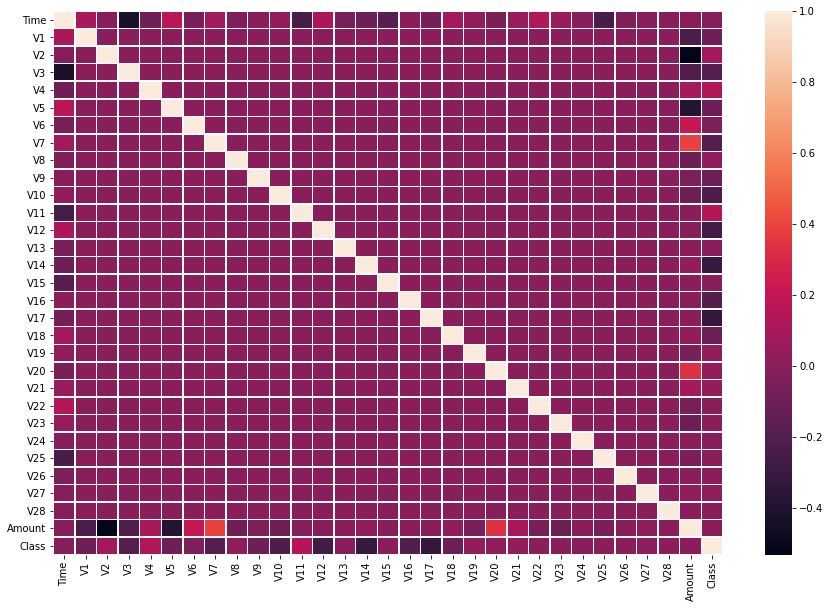

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, linewidths=.5)

In [53]:
X = fraud_df.drop("Class", axis=1)
y = fraud_df["Class"]

#### Data Split

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25 ,random_state = 1)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [64]:
y_train.value_counts()

0    213224
1       381
Name: Class, dtype: int64

In [65]:
y_test.value_counts()

0    71091
1      111
Name: Class, dtype: int64

## Model building

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_fraud_rf = RandomForestClassifier()
model_fraud_rf.fit(X_train,y_train)

RandomForestClassifier()

In [71]:
print ( "Training Accuracy",  model_fraud_rf.score(X_train,y_train))

Training Accuracy 1.0


In [72]:
print("Test Accuracy", model_fraud_rf.score(X_train,y_train))

Test Accuracy 1.0


##  Model Evaluation

In [73]:
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score

In [74]:
y_pred = model_fraud_rf.predict(X_test)

In [ ]:
print("f1_score : ",f1_score(y_test,y_pred) )
print("Precission  : ",precision_score(y_test,y_pred) )
print("Recall : ",recall_score(y_test,y_pred) )


In [76]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred) )

Confusion Matrix
[[71085     6]
 [   27    84]]


In [77]:
print("Classification _report")
print(classification_report(y_test,y_pred))

Classification _report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.76      0.84       111

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [78]:
print("Mathews Co-relation Coefficient")
print(matthews_corrcoef(y_test,y_pred))

Mathews Co-relation Coefficient
0.8402024985584303


Text(0.5, 24.0, 'Predicted class')

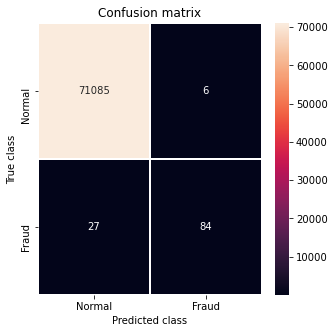

In [83]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
cm = confusion_matrix(y_test,y_pred) 
plt.figure(figsize =(5, 5)) 
sns.heatmap(cm, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d",linewidths=.5); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
